In [47]:
# Importando librerías y Dataset
%matplotlib inline

from pathlib import Path
import scipy.io as sci
import matplotlib.pyplot as plt
import numpy as np
import pprint as pp

# Configurar ruta del Dataset
DATADIR = Path().resolve() / "../data"
SIGN    = DATADIR / "Data_Clase3_Vis.mat"
mat_data = sci.loadmat(SIGN)
CO2         = mat_data['co2']
ECG         = mat_data['ecg']
PLETH       = mat_data['pleth']
Fs          = mat_data['fs'][0][0]
t_sampling  = 1 / Fs

pp.pprint(f"Fs -> {Fs}")
pp.pprint(f"Ts -> {t_sampling}")

pp.pprint(f"CO2 -> {len(CO2)}")
pp.pprint(f"ECG -> {len(ECG)}")
pp.pprint(f"PLETH -> {len(PLETH)}")


'Fs -> 300'
'Ts -> 0.0033333333333333335'
'CO2 -> 144001'
'ECG -> 144001'
'PLETH -> 144001'


In [40]:
# Obtenemos la longitud de la señal que es la cantidad de samples * el valor de Ts
sign_time   = ( len(CO2) ) * t_sampling

# arange me permite especificar el step en el que quiero quiero tomar entre un elemento y otro
v_time      = np.arange(0, sign_time, t_sampling, dtype=float, ).reshape(CO2.shape) # le damos el mismo shape de la señal al v_time
pp.pprint(f"v_tie Shape -> {v_time.shape}")
pp.pprint(f"CO2 Shape -> {CO2.shape}")

'v_tie Shape -> (144001, 1)'
'CO2 Shape -> (144001, 1)'
'CO2 Shape -> 480.0033333333334'


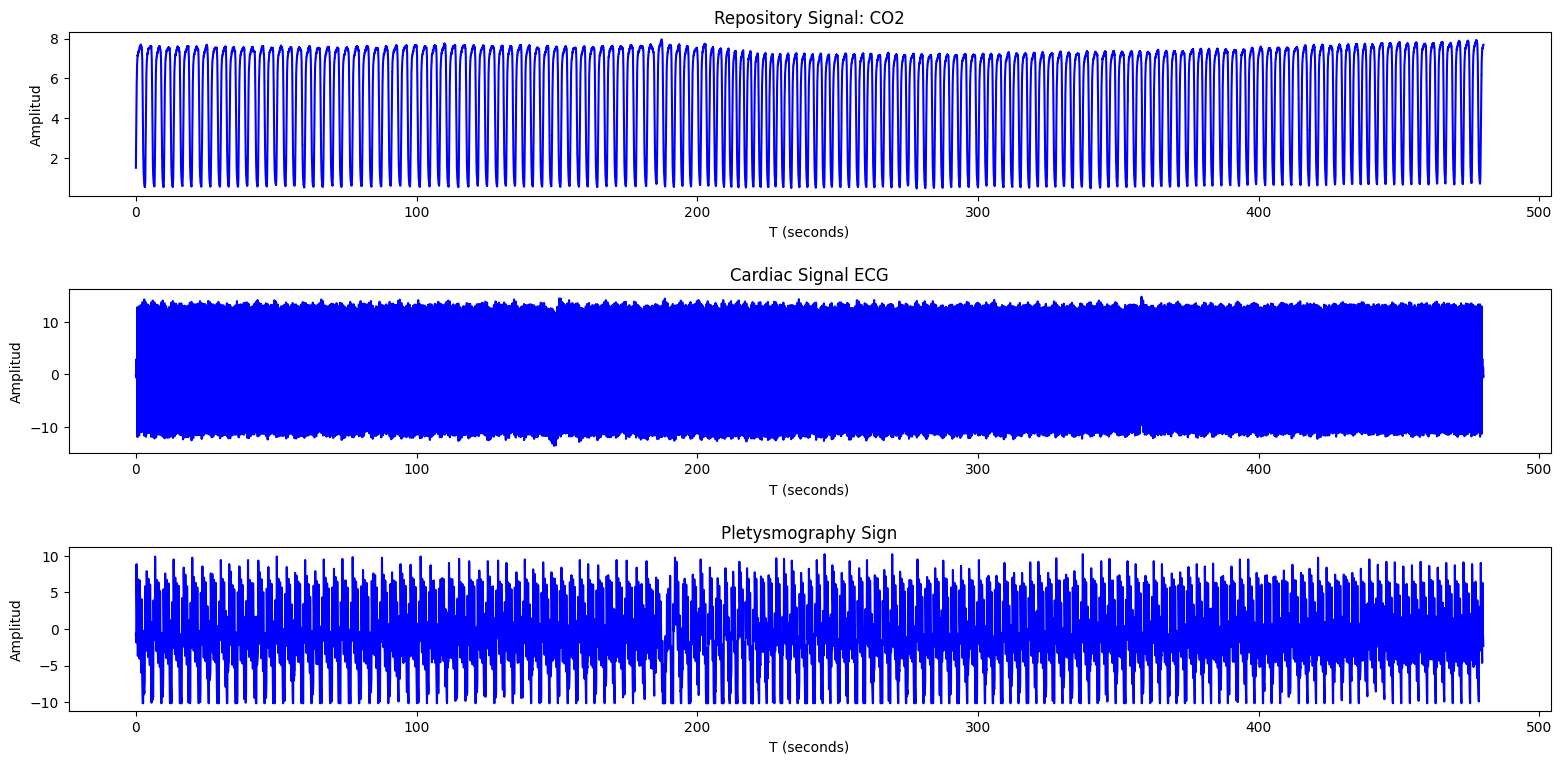

In [46]:
# Graficar tres subplot
fig, (axes) = plt.subplots(3, 1, sharex="row", figsize=(16,8))
axes[0].set_title("Repository Signal: CO2")
axes[1].set_title("Cardiac Signal ECG")
axes[2].set_title("Pletysmography Sign")

for ax in axes.flat:
    ax.set_xlabel("T (seconds)")
    ax.set_ylabel("Amplitud")

axes[0].plot( v_time, CO2, color="blue" )
axes[1].plot( v_time, ECG, color="blue" )
axes[2].plot( v_time, PLETH, color="blue" )

plt.tight_layout(pad=2.0)
plt.show()